In [28]:
import pandas as pd
df = pd.read_csv("D:/MS in Data Analytics/Statistics for Data Analytics/datasets/IncomeData.csv")
df.head()

,age,yrsed,edcat,yrsempl,income,creddebt,othdebt,default,jobsat,homeown,address,cars,carvalue
0,45,6,1,4,17,0.371518,1.294482,0,4,1,22,1,9.1
1,67,6,1,15,12,0.375552,0.392448,0,3,1,28,1,5.9
2,68,6,1,7,9,0.200970,0.789030,0,5,0,21,1,5.8
3,75,6,1,35,16,0.314096,0.757904,0,4,0,11,1,5.8
4,38,7,1,8,37,0.143190,0.411810,0,3,0,11,1,22.1


Age in years (age)
Years of education (yrsed)
Level of education (edcat)          
1=Did not complete high school, 2=High school degree, 3=Some college, 4=College degree, 5=Postgraduate degree

Years with current employer (yrsempl)

Credit card debt in thousands (creddebt)

Other debt in thousands (othdebt)

Ever defaulted on a bank loan (default)
0=no, 1=yes

Job satisfaction (jobsat) 
1=Highly dissatisfied, 2=Somewhat dissatisfied, 3=Neutral, 4=Somewhat satisfied, 5=Highly satisfied

Home ownership (homeown)
0=rent, 1=own

Years at current address (address)

Number of cars owned/leased (cars)

Value of primary vehicle (carvalue)

1) Outliers

2) Corelation

3) 

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4508 entries, 0 to 4507
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       4508 non-null   int64  
 1   yrsed     4508 non-null   int64  
 2   edcat     4508 non-null   int64  
 3   yrsempl   4508 non-null   int64  
 4   income    4508 non-null   int64  
 5   creddebt  4508 non-null   float64
 6   othdebt   4508 non-null   float64
 7   default   4508 non-null   int64  
 8   jobsat    4508 non-null   int64  
 9   homeown   4508 non-null   int64  
 10  address   4508 non-null   int64  
 11  cars      4508 non-null   int64  
 12  carvalue  4508 non-null   float64
dtypes: float64(3), int64(10)
memory usage: 458.0 KB


In [30]:
# To detect and analise outliers, we will use and test various statistical tests.
df.shape

(4508, 13)

In [31]:
df.describe()

,age,yrsed,edcat,yrsempl,income,creddebt,othdebt,default,jobsat,homeown,address,cars,carvalue
count,4508.000000,4508.000000,4508.000000,4508.000000,4508.000000,4508.000000,4508.000000,4508.000000,4508.000000,4508.000000,4508.000000,4508.000000,4508.000000
mean,46.931677,14.531500,2.667480,9.718722,55.407720,1.897866,3.691447,0.238909,2.964286,0.628438,16.371340,2.367125,26.081788
std,17.665010,3.285624,1.213648,9.650876,56.513684,3.542646,5.378583,0.426464,1.377274,0.483276,12.367679,1.157778,20.862577
min,18.000000,6.000000,1.000000,0.000000,9.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,2.200000
25%,32.000000,12.000000,2.000000,2.000000,24.000000,0.387923,0.982819,0.000000,2.000000,0.000000,6.000000,2.000000,11.300000
50%,46.000000,14.000000,2.000000,7.000000,38.000000,0.931824,2.081635,0.000000,3.000000,1.000000,14.000000,2.000000,18.900000
75%,62.000000,17.000000,4.000000,15.000000,68.000000,2.076516,4.435112,0.000000,4.000000,1.000000,25.000000,3.000000,34.000000
max,79.000000,23.000000,5.000000,52.000000,1073.000000,109.072596,141.459150,1.000000,5.000000,1.000000,57.000000,8.000000,99.600000


##### If we have a look at the columns such as "yrsemp", "income" , "creddebt", "othdebt", "address" , "cars", "car value"

"yrsemp" : 3 rd quartile : 15 , maximum value: 52

"creddebt" : 3 rd quartile : 2, maximum value: 109

"othdebt" : 3 rd quartile : 4.435112 , maximum value: 141.459

"address" : 3 rd quartile : 25 , maximum value: 57

"cars" : 3 rd quartile : 3 , maximum value: 8

"car value" : 3 rd quartile : 34 , maximum value: 99

##### As we can see that there is a lot more difference between 3 rd quartile and maximum value, these kind of outliers will affect our model.

##### Similarly if we observe columns "income" and "car value"


"car value" : 1st quartile : 11.30 , minimum value: 2.20

#### we will use IQR to remove outliers for all these columns mentioned above

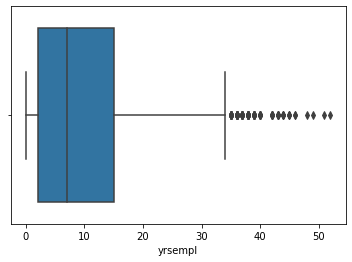

In [32]:
# We will use box plot to visualise the data.
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(df['yrsempl'])

In [33]:
# To remove outliers, we will use IQR for 
# Years of employment "yrsemp"

Q1_yrsemp , Q3_yrsemp = df.yrsempl.quantile([0.25,0.75])

IQR = Q3_yrsemp - Q1_yrsemp
upper_bound = Q3_yrsemp + 1.5 * IQR
lower_bound = Q1_yrsemp - 1.5 * IQR
print(upper_bound,lower_bound)

34.5 -17.5


In [34]:
# we will remove outliers for "Years of Employment" and filter the dataset. 
df_1 = df[(df.yrsempl < upper_bound) & (df.yrsempl > lower_bound)]

In [35]:
df_1.shape

(4392, 13)

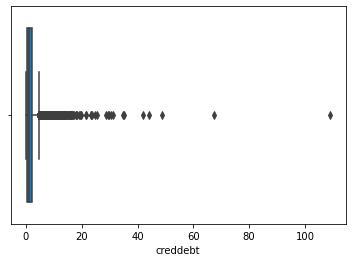

In [36]:
sns.boxplot(df['creddebt'])

In [37]:
Q1_creddebt , Q3_creddebt = df.creddebt.quantile([0.25,0.75])

IQR_creddebt = Q3_creddebt - Q1_creddebt
upper_bound_creddebt = Q3_creddebt + 1.5 * IQR_creddebt
lower_bound_creddebt = Q1_creddebt - 1.5 * IQR_creddebt
print(upper_bound_creddebt,lower_bound_creddebt)

4.609406250000001 -2.14496775


In [38]:
# we will remove outliers for "Creddebt" and filter the dataset. 
df_2 = df_1[(df_1.creddebt < upper_bound_creddebt) & (df_1.creddebt > lower_bound_creddebt)]

In [39]:
df_2.shape

(4002, 13)

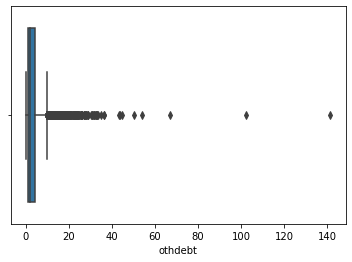

In [40]:
sns.boxplot(df['othdebt'])

In [41]:
Q1_othdebt , Q3_othdebt = df.othdebt.quantile([0.25,0.75])

IQR_othdebt = Q3_othdebt- Q1_othdebt
upper_bound_othdebt = Q3_othdebt + 1.5 * IQR_othdebt
lower_bound_othdebt = Q1_othdebt - 1.5 * IQR_othdebt
print(upper_bound_othdebt,lower_bound_othdebt)

9.613551999999999 -4.19562


In [42]:
df_3 = df_2[(df_2.othdebt < upper_bound_othdebt) & (df_2.othdebt > lower_bound_othdebt)]
df_3.shape

(3830, 13)

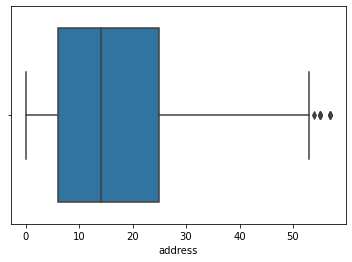

In [43]:
sns.boxplot(df['address'])

In [44]:
Q1_address , Q3_address = df.address.quantile([0.25,0.75])

IQR_address = Q3_address- Q1_address
upper_bound_address = Q3_address + 1.5 * IQR_address
lower_bound_address = Q1_address - 1.5 * IQR_address
print(upper_bound_address,lower_bound_address)

53.5 -22.5


In [45]:
df_4 = df_3[(df_3.address < upper_bound_address) & (df_3.address > lower_bound_address)]
df_4.shape

(3826, 13)

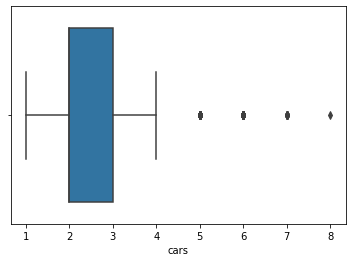

In [46]:
sns.boxplot(df['cars'])

In [47]:
Q1_cars , Q3_cars = df.cars.quantile([0.25,0.75])

IQR_cars = Q3_cars- Q1_cars
upper_bound_cars = Q3_cars + 1.5 * IQR_cars
lower_bound_cars = Q1_cars - 1.5 * IQR_cars
print(upper_bound_cars,lower_bound_cars)

4.5 0.5


In [48]:
df_5 = df_4[(df_4.cars < upper_bound_cars) & (df_4.cars > lower_bound_cars)]
df_5.shape

(3643, 13)

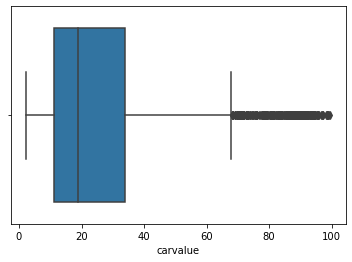

In [49]:

sns.boxplot(df['carvalue'])

In [50]:
Q1_carvalue , Q3_carvalue = df.carvalue.quantile([0.25,0.75])

IQR_carvalue = Q3_carvalue- Q1_carvalue
upper_bound_carvalue = Q3_carvalue + 1.5 * IQR_carvalue
lower_bound_carvalue = Q1_carvalue - 1.5 * IQR_carvalue
print(upper_bound_carvalue,lower_bound_carvalue)

68.05 -22.749999999999996


In [51]:
df_6 = df_5[(df_5.carvalue < upper_bound_carvalue) & (df_5.carvalue > lower_bound_carvalue)]
df_6.shape

(3553, 13)

In [52]:
#### The data has been filtered, we will use heatmap to Analise the correlation matrix.

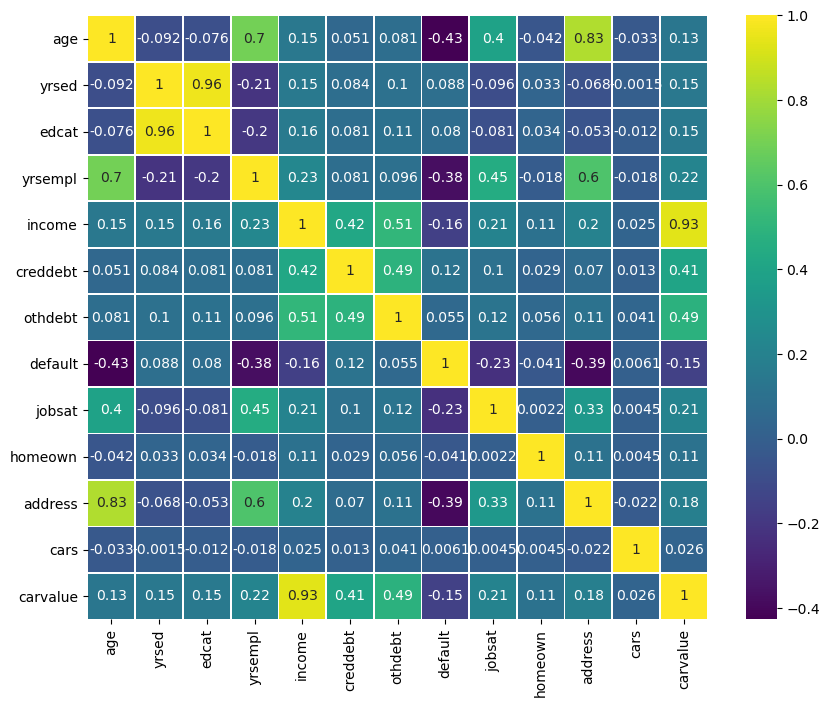

In [53]:
plt.figure(figsize=(10,8),dpi=100)
sns.heatmap(df_6.corr(),cmap="viridis",annot=True,linewidth=0.5)